In [79]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage as ndi

from skimage.morphology import watershed
from skimage.feature import peak_local_max
from PIL import Image

from skimage.morphology import skeletonize, thin
from skimage.util import invert
from skimage import measure
from skimage.morphology import erosion, dilation, opening, closing, white_tophat
from skimage.morphology import black_tophat, skeletonize, convex_hull_image
from skimage.morphology import disk
from skimage import feature
from skimage.filters import roberts, sobel, scharr, prewitt
import seaborn as sns
sns.reset_orig()

from skimage import restoration

from skimage import exposure
from skimage.filters import gaussian

from scipy import ndimage

from time import time

from skimage.color import rgb2gray


from skimage.filters.rank import entropy
import scipy

import math

import cv2
import networkx as nx
from scipy import interpolate

from skimage.segmentation import random_walker
from skimage.data import binary_blobs
from skimage.exposure import rescale_intensity
import glob
from skimage.morphology import remove_small_objects
from skimage.morphology import disk
from skimage import io

import pandas as pd

import threading

/Users/spencerlab/anaconda3/lib/python3.7/site-packages/matplotlib/__init__.py:855: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))
/Users/spencerlab/anaconda3/lib/python3.7/site-packages/matplotlib/__init__.py:846: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 2.2 and will be removed in 3.1.
  "2.2", name=key, obj_type="rcparam", addendum=addendum)


In [88]:

csv = pd.read_csv("all3_JAS.csv")

In [89]:
csv = csv.drop(csv.index[0])
csv = csv.drop(csv.index[0])
csv = csv.drop(csv.index[0])
csv

,all3,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17
3,0.0,3,1420,1837,Y,2,240,1,1,1831,1418,586.929297275234,0,1810,1321,646.811409917914,1,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1.0,6,1415,1850,Y,3,273,2,0,1852,1415,616.627926711076,0,1810,1321,660.228748238063,1,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2.0,9,1499,1845,N,4,261,3,6,1840,1499,485.804487422667,0,1881,1625,440.913823779659,1,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,3.0,3,1522,1868,N,2,81,4,6,1868,1516,493.587884778385,0,1881,1625,433.519319062023,1,NaN
10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,4.0,9,1513,1850,N,4,81,5,3,1849,1513,475.921211966855,0,1881,1625,431.427861872643,1,NaN
12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [90]:
#for i in range(len(csv.index)):
    
i =1 
while(i<len(csv.index)):
    csv = csv.drop(csv.index[i])
    i=i+1

In [94]:
csv

,all3,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17
3,0.0,3,1420,1837,Y,2,240,1,1,1831,1418,586.929297275234,0,1810,1321,646.811409917914,1,NaN
5,1.0,6,1415,1850,Y,3,273,2,0,1852,1415,616.627926711076,0,1810,1321,660.228748238063,1,NaN
7,2.0,9,1499,1845,N,4,261,3,6,1840,1499,485.804487422667,0,1881,1625,440.913823779659,1,NaN
9,3.0,3,1522,1868,N,2,81,4,6,1868,1516,493.587884778385,0,1881,1625,433.519319062023,1,NaN
11,4.0,9,1513,1850,N,4,81,5,3,1849,1513,475.921211966855,0,1881,1625,431.427861872643,1,NaN
13,5.0,12,1438,1669,N,5,69,6,6,1670,1433,330.992447043735,0,1645,1418,325.567197364845,2,NaN
15,6.0,12,1458,1837,N,5,90,7,5,1837,1458,536.032648259413,0,1810,1321,624.74314722132,1,NaN
17,7.0,15,1510,1742,Y,6,441,8,16,1742,1510,328.099070404047,21,1657,1559,234.806303152194,3,NaN
19,8.0,18,1431,1839,N,7,81,9,23,1843,1431,579.85601661102,0,1810,1321,642.097344644876,1,NaN
21,9.0,18,1471,1854,N,7,105,10,18,1850,1471,538.82279090625,0,1810,1321,631.928793456984,1,NaN


In [166]:
stack = io.imread("/Users/spencerlab/Desktop/final_files/Day_3/#1/Stack_day_3.tif")
GS_map = io.imread("/Users/spencerlab/Desktop/final_files/Day_3/#1/Green cells/Green_cells_day_3.tif") 

In [113]:
for row in range(len(csv.index)):
    print(csv.loc[csv.index[row]] ) 

all3                          0
Unnamed: 1                    3
Unnamed: 2                 1420
Unnamed: 3                 1837
Unnamed: 4                    Y
Unnamed: 5                    2
Unnamed: 6                  240
Unnamed: 7                    1
Unnamed: 8                    1
Unnamed: 9                 1831
Unnamed: 10                1418
Unnamed: 11    586.929297275234
Unnamed: 12                   0
Unnamed: 13                1810
Unnamed: 14                1321
Unnamed: 15    646.811409917914
Unnamed: 16                   1
Unnamed: 17                 NaN
Name: 3, dtype: object
all3                          1
Unnamed: 1                    6
Unnamed: 2                 1415
Unnamed: 3                 1850
Unnamed: 4                    Y
Unnamed: 5                    3
Unnamed: 6                  273
Unnamed: 7                    2
Unnamed: 8                    0
Unnamed: 9                 1852
Unnamed: 10                1415
Unnamed: 11    616.627926711076
Unnamed: 12      

Name: 659, dtype: object
all3                        329
Unnamed: 1                  261
Unnamed: 2                  446
Unnamed: 3                 1000
Unnamed: 4                    Y
Unnamed: 5                   88
Unnamed: 6                  222
Unnamed: 7                  330
Unnamed: 8                  261
Unnamed: 9                  995
Unnamed: 10                 446
Unnamed: 11    779.946793057065
Unnamed: 12                 240
Unnamed: 13                 976
Unnamed: 14                 462
Unnamed: 15    755.503143606961
Unnamed: 16                 209
Unnamed: 17                 NaN
Name: 661, dtype: object
all3                        330
Unnamed: 1                  258
Unnamed: 2                  514
Unnamed: 3                  958
Unnamed: 4                    N
Unnamed: 5                   87
Unnamed: 6                    3
Unnamed: 7                  331
Unnamed: 8                  265
Unnamed: 9                  958
Unnamed: 10                 517
Unnamed: 11    625.832

In [140]:
z= int(int(csv.loc[csv.index[0]][1])/3)
y= (int(csv.loc[csv.index[0]][2]))
x= (int(csv.loc[csv.index[0]][3]))

In [167]:
img = stack[z,y-10:y+10,x-10:x+10]
mask = GS_map[z,y-10:y+10,x-10:x+10]

In [168]:
size = (int(csv.loc[csv.index[0]][6]))


In [169]:
size

240

In [152]:
print(y, x)

1420 1837


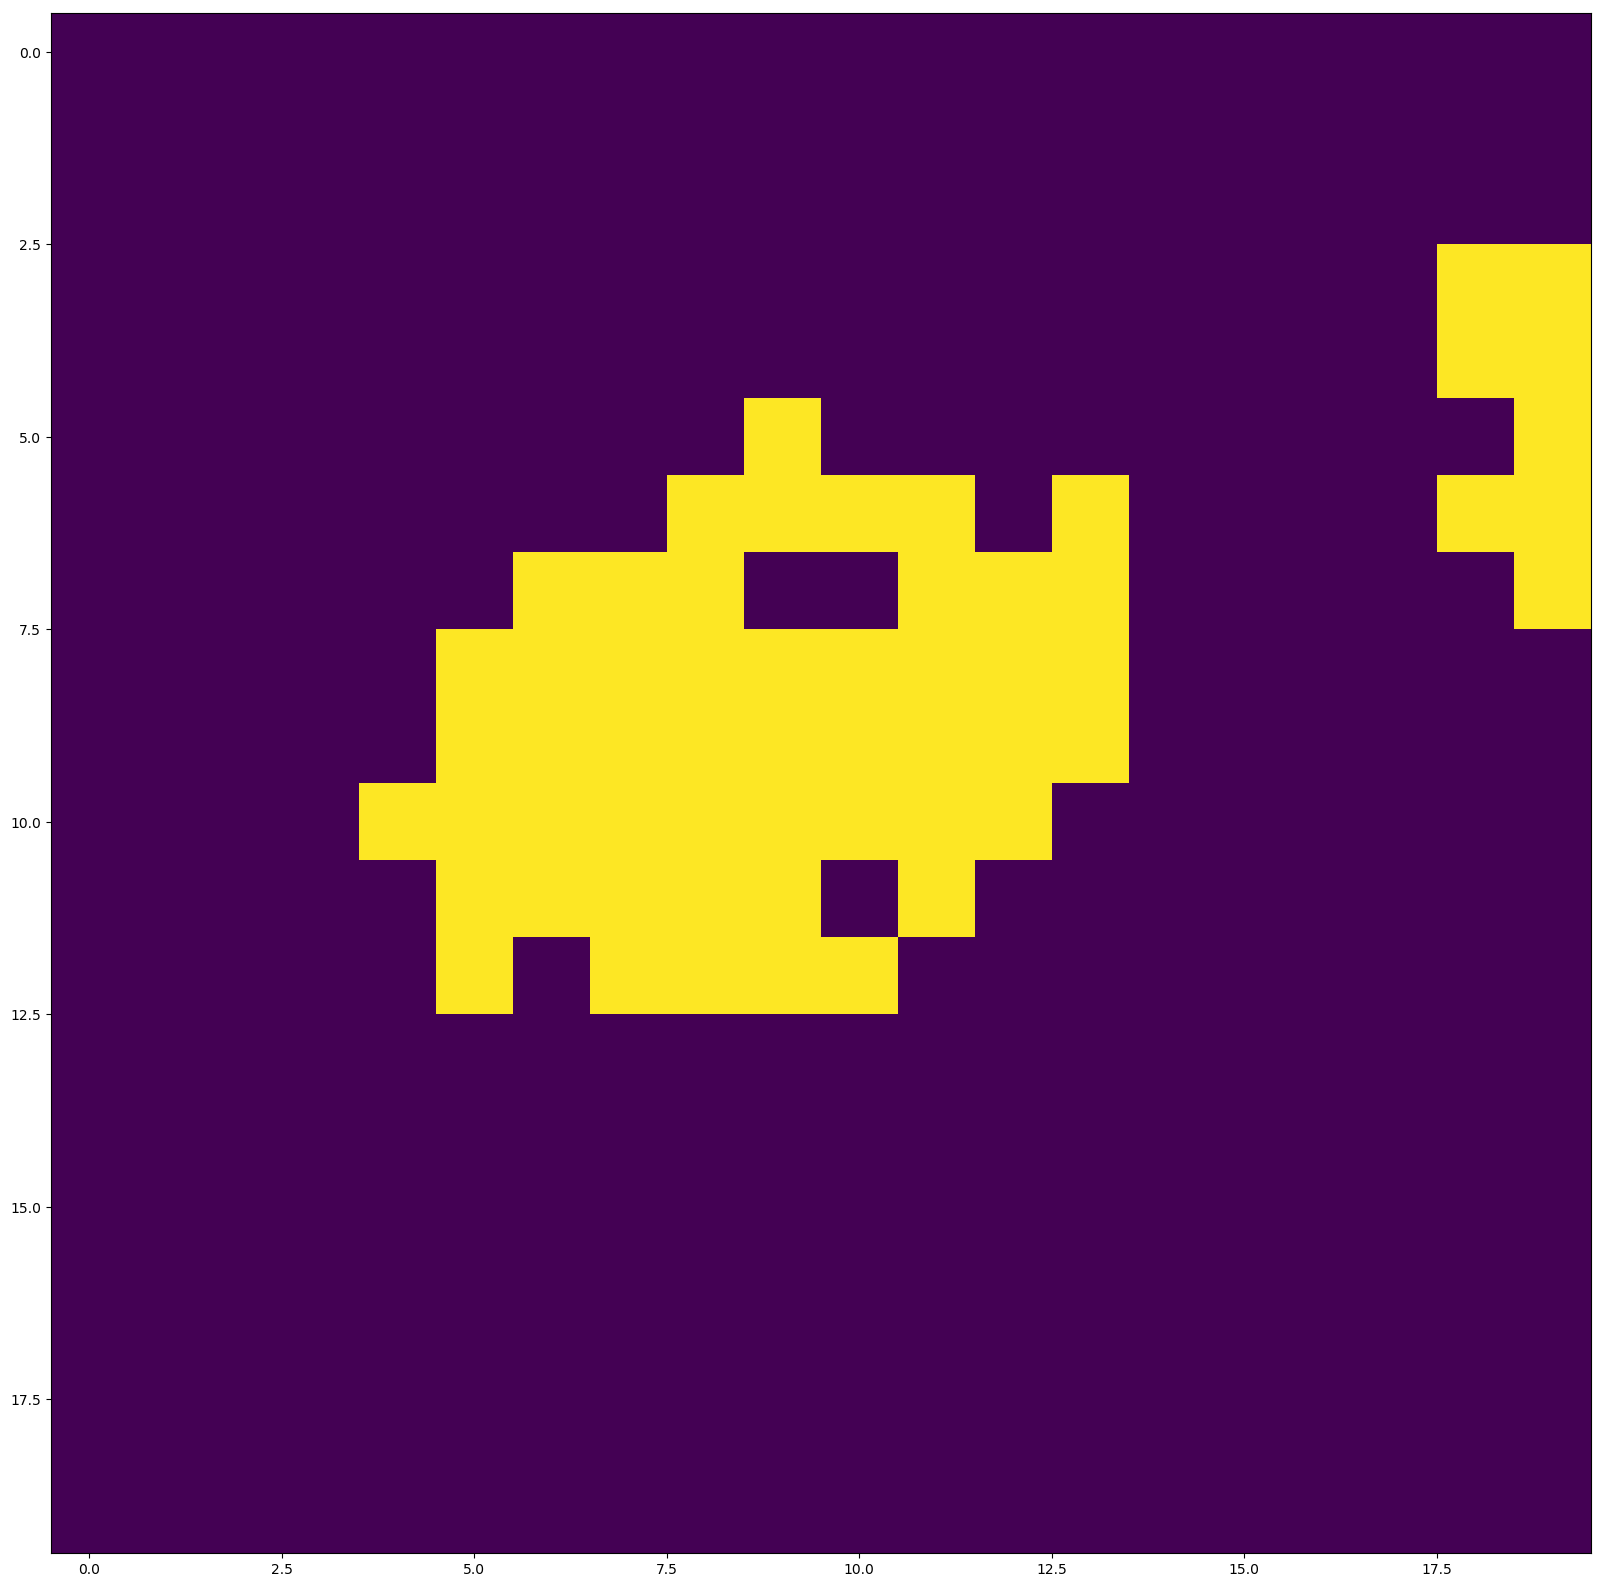

In [170]:
plt.figure(figsize=(20,20))
plt.imshow(mask)

In [171]:
R = img[:,:, 0]
G = img[:,:, 1]
B = img[:,:, 2]

value = (R+G+B)/3

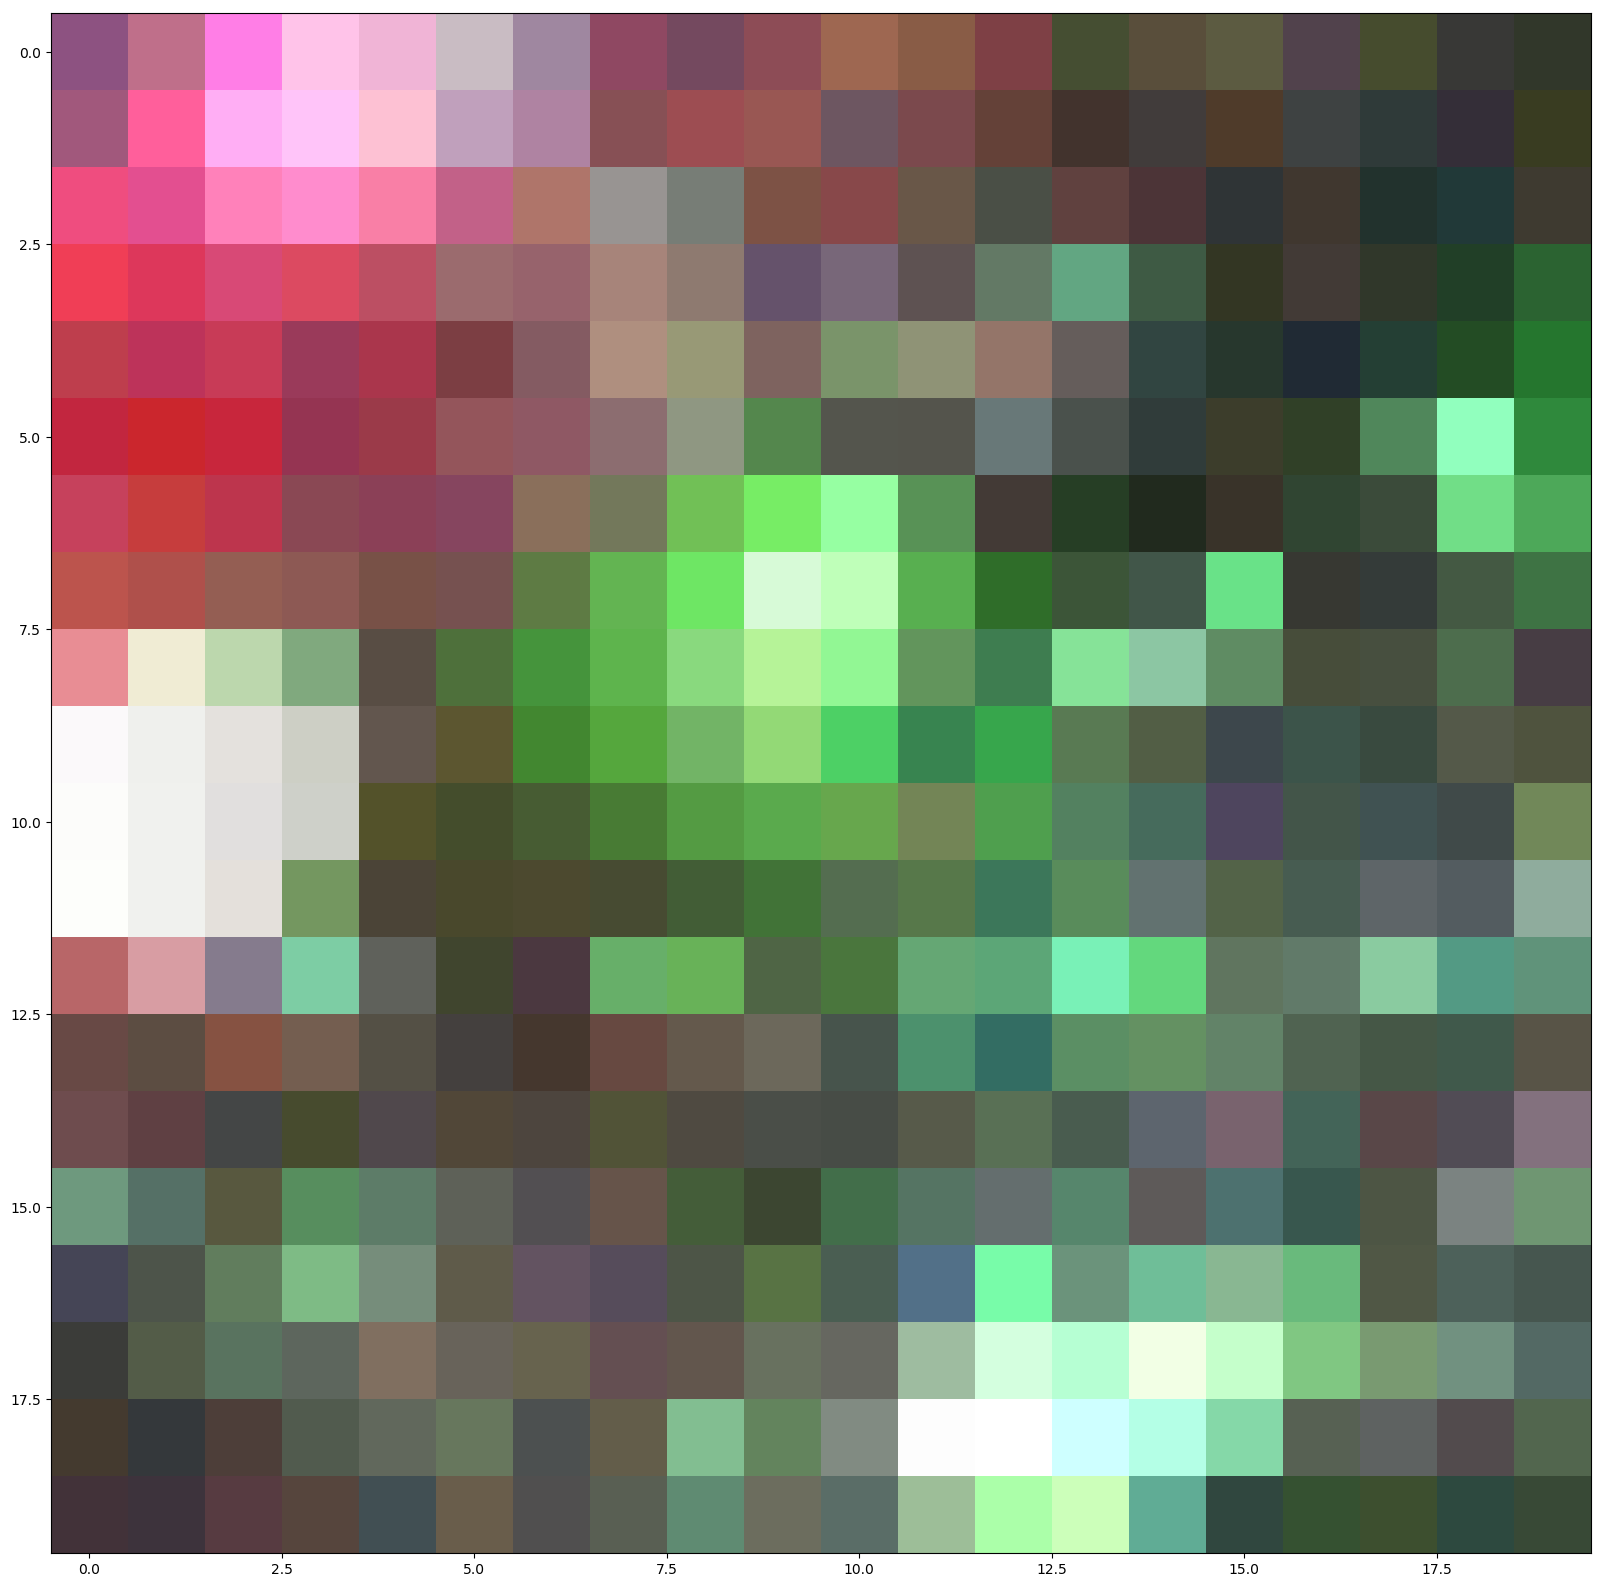

In [175]:
plt.figure(figsize=(20,20))
plt.imshow(img)

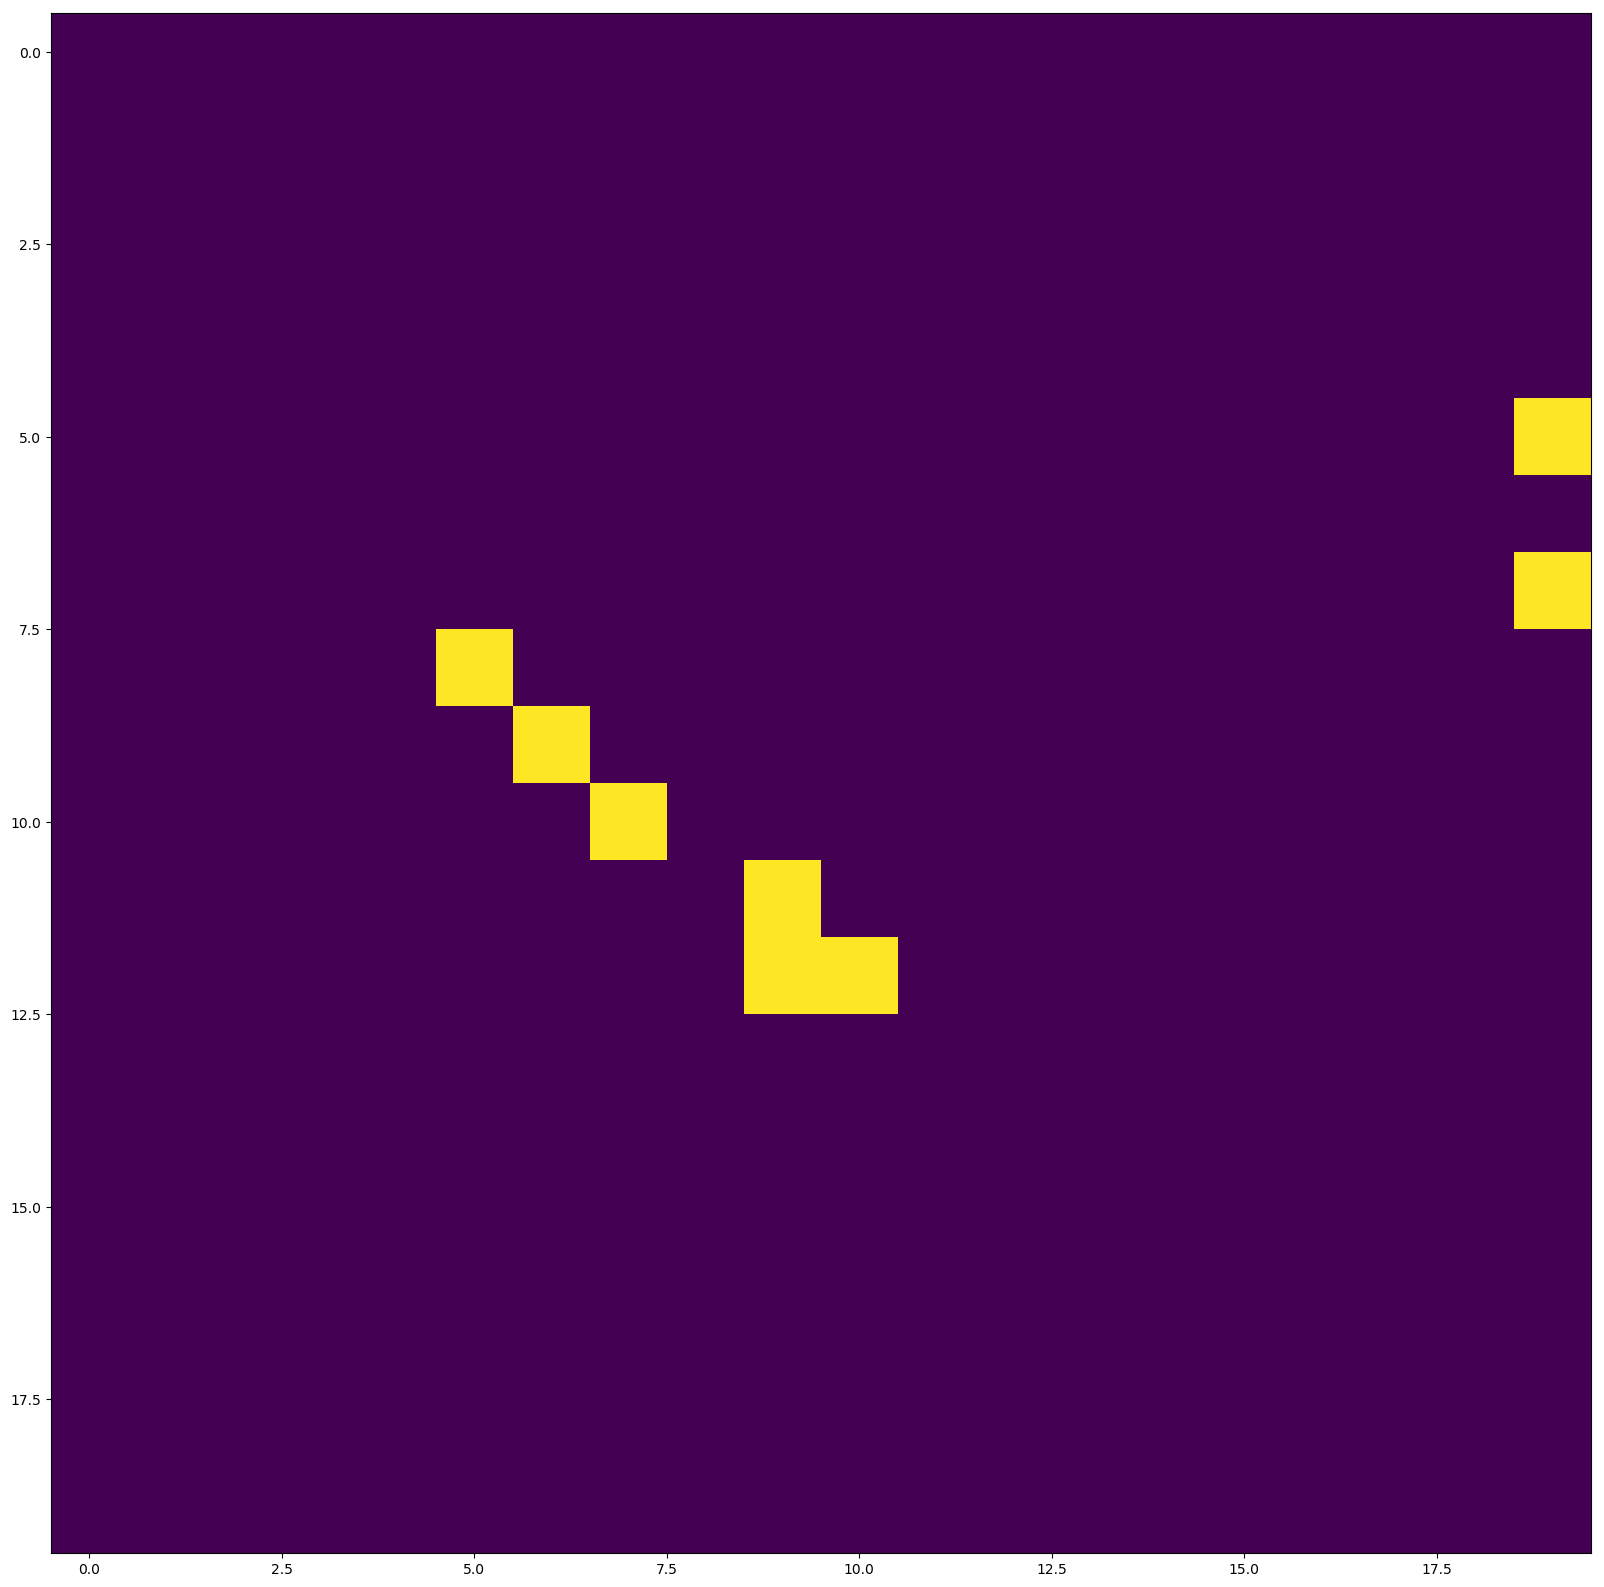

In [192]:
plt.figure(figsize=(20,20))
plt.imshow(value*(mask)>76)

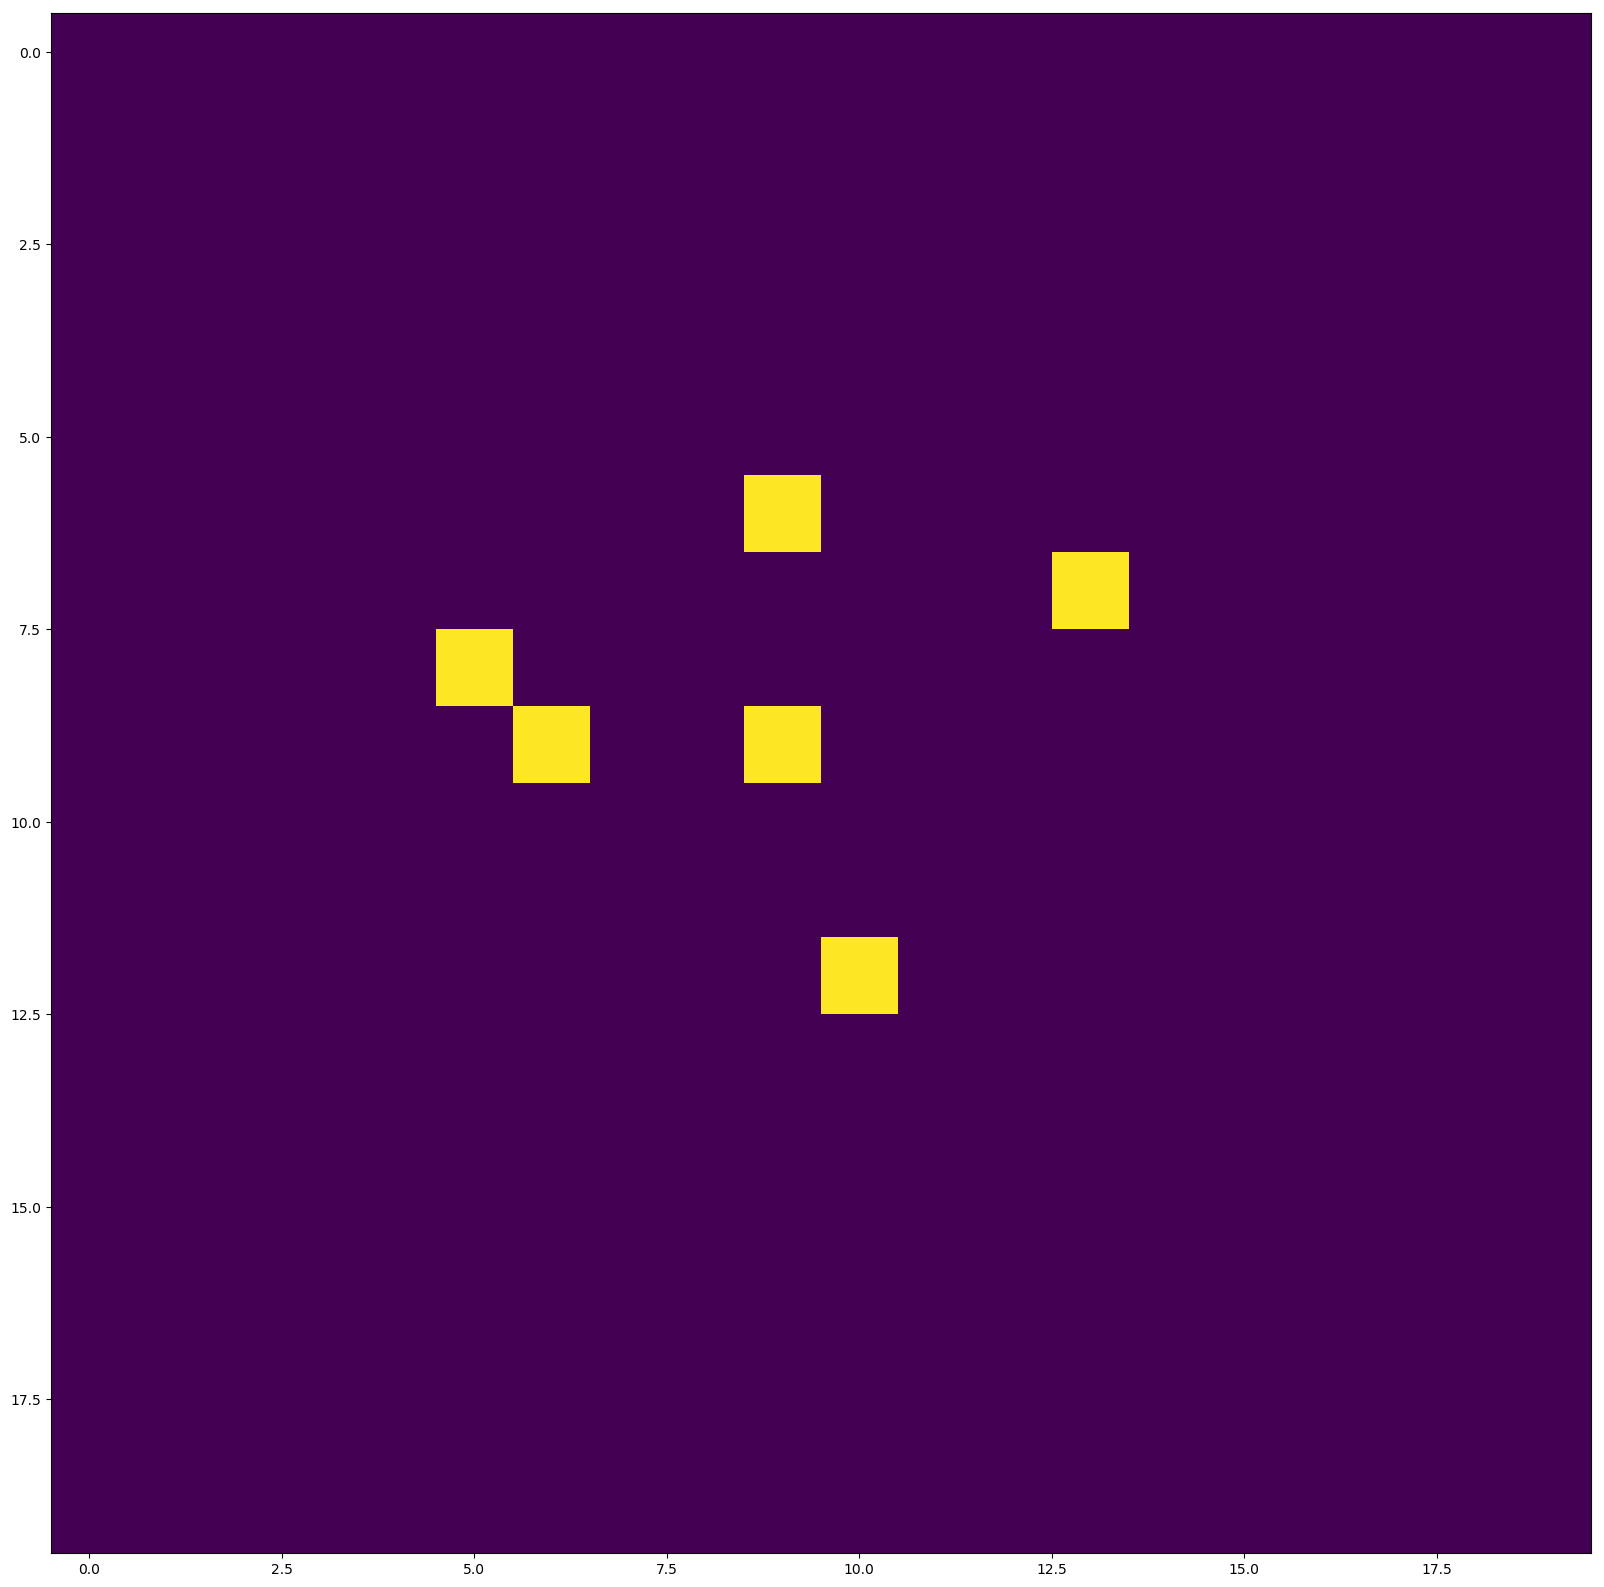

In [172]:
plt.figure(figsize=(20,20))


plm = peak_local_max(value*(mask), indices=False, footprint=np.ones((3, 3)), labels=(mask))


plt.imshow(plm)

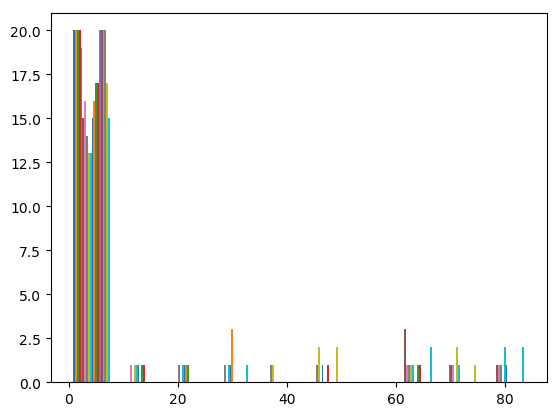

In [187]:
n, bins, patches = plt.hist(value*(mask))

In [188]:
len(bins)

11

In [189]:
bins

array([ 0.        ,  8.43333333, 16.86666667, 25.3       , 33.73333333,
       42.16666667, 50.6       , 59.03333333, 67.46666667, 75.9       ,
       84.33333333])